# Object detection in the "wild"

A good application in quality management is classifying and counting objects.

In [1]:
# Import OpenCV
import cv2
# Since OpenCV is based on numpy:
import numpy as np
# Import pyplot (we will need this to plot with the notebook)
import matplotlib.pyplot as plt
# Import ColorThief
from colorthief import ColorThief
# Helper function to provide plots in true colors in the notebook
def imshow(title, im):
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title(title)

## Aufgabenstellung

Diesmal geht es um Smarties:

![Smarties](Smarties0.png)

1. Findet und zählt die roten Smarties in den Bildern.

    - Dieses Beispiel ist gut in Anlehnung an die Sh2-Tafeln im Beispiel lösbar.

1. Challenge: zählt große und kleine Smarties (habe ich bisher selbst nicht gelöst...).

    - Hier könnte "HoughCircles" helfen.

1. Challenge 2: Zählt, wie viele Smarties jeweils weggenommen werden.

    - Für Veränderungen ist es hilfreich, Bilder zu subtrahieren.

Dokumentiert eure Lösungen wie gewohnt in einem Jupyter Notebook.


In [2]:
def smarties_zählen(bildpfad, ausgewählte_farben):
    bild = cv2.imread(bildpfad)

    if bild is None:
        print("Fehler: Das Bild konnte nicht geladen werden.")
        return

    # Konvertiere das Bild zu HSV (Hue, Saturation, Value)
    hsv_bild = cv2.cvtColor(bild, cv2.COLOR_BGR2HSV)

    # Definiere die Farbintervalle für verschiedene Smartie-Farben
    farbintervalle = {
        'rot': ([0, 100, 100], [10, 255, 255]),
        'blau': ([110, 50, 50], [130, 255, 255]),
        'gruen': ([40, 40, 40], [80, 255, 255]),
        # Hier kannst du weitere Farben hinzufügen
    }

    # Überprüfe, ob die ausgewählten Farben gültig sind
    ungültige_farben = [farbe for farbe in ausgewählte_farben if farbe not in farbintervalle]
    if ungültige_farben:
        print(f"Warnung: Die Farben {', '.join(ungültige_farben)} wurden nicht erkannt.")
        return {farbe: 0 for farbe in ausgewählte_farben}

    ergebnisse = {}

    for farbe in ausgewählte_farben:
        farbuntergrenze, farbobergrenze = farbintervalle[farbe]

        # Erzeuge die Farbmaske für die Smarties
        maske = cv2.inRange(hsv_bild, np.array(farbuntergrenze), np.array(farbobergrenze))

        # Erzeuge den Konturfilter
        konturen, _ = cv2.findContours(maske, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Glättung
        gültige_konturen = [cnt for cnt in konturen if cv2.contourArea(cnt) > 100]

        # Zeichne Konturen auf das Bild
        cv2.drawContours(bild, gültige_konturen, -1, (0, 255, 0), 2)

        ergebnisse[farbe] = len(gültige_konturen)

    bild_rgb = cv2.cvtColor(bild, cv2.COLOR_BGR2RGB)

    plt.imshow(bild_rgb)
    plt.title('Smarties.png')
    plt.axis('off')
    plt.show()

    return ergebnisse

# Beispielaufruf für rote und blaue Smarties
#bildpfad = 'smarties0.png'
#ausgewählte_farben = ['rot', 'blau']
#ergebnisse = smarties_zählen(bildpfad, ausgewählte_farben)
#for farbe, anzahl in ergebnisse.items():
#    print(f'Anzahl {farbe} Smarties: {anzahl}')

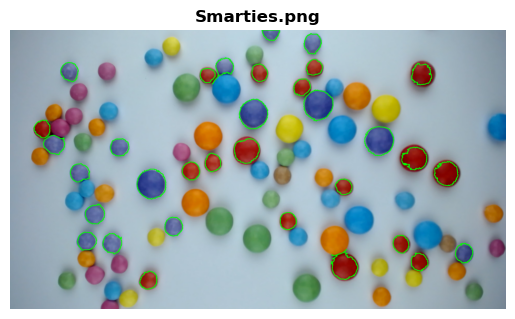

Anzahl rot Smarties: 17
Anzahl blau Smarties: 16


In [3]:
bildpfad = 'smarties0.png'
ausgewählte_farben = ['rot', 'blau']
ergebnisse = smarties_zählen(bildpfad, ausgewählte_farben)
for farbe, anzahl in ergebnisse.items():
    print(f'Anzahl {farbe} Smarties: {anzahl}')

In [4]:
def zähle_große_kleine_smarties(image_path, min_radius, max_radius, radius_threshold):
    img = cv2.imread(image_path)

    if img is None:
        print("Fehler: Das Bild konnte nicht geladen werden.")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=0.5,
        minDist=40,
        param1=45,
        param2=17,
        minRadius=min_radius,
        maxRadius=max_radius
    )

    if circles is not None:
        circles = np.uint16(np.around(circles))

        small_smarties = 0
        big_smarties = 0

        for i in circles[0, :]:
            radius = i[2]

            if radius < radius_threshold:
                small_smarties += 1
                cv2.circle(img, (i[0], i[1]), radius, (0, 0, 255), 2)
            else:
                big_smarties += 1
                cv2.circle(img, (i[0], i[1]), radius, (0, 255, 0), 2)

        print(f"Anzahl kleiner Smarties: {small_smarties}")
        print(f"Anzahl großer Smarties: {big_smarties}")

        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Smarties')
        plt.axis('off')
        plt.show()

        return {'kleine_smarties': small_smarties, 'große_smarties': big_smarties}
    else:
        print("Keine Smarties gefunden.")
        return {'kleine_smarties': 0, 'große_smarties': 0}

# Beispielaufruf
#image_path = 'smarties0.png'  # Ersetze dies durch den tatsächlichen Pfad zu deinem Bild
#min_radius=10
#max_radius=100
#radius_threshold=50
#ergebnisse = zähle_große_kleine_smarties(image_path, min_radius=10, max_radius=100, radius_threshold=50)
#print(ergebnisse)

Anzahl kleiner Smarties: 63
Anzahl großer Smarties: 24


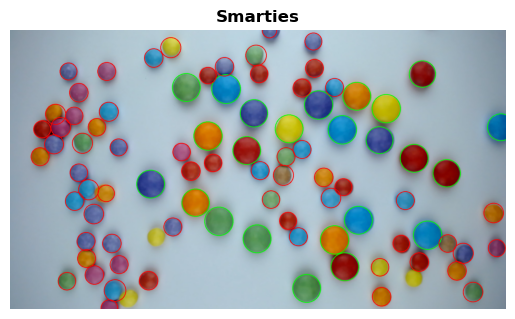

{'kleine_smarties': 63, 'große_smarties': 24}

In [5]:
image_path = 'smarties0.png'  # Ersetze dies durch den tatsächlichen Pfad zu deinem Bild
min_radius=20
max_radius=100
radius_threshold=50
zähle_große_kleine_smarties(image_path, min_radius, max_radius, radius_threshold)

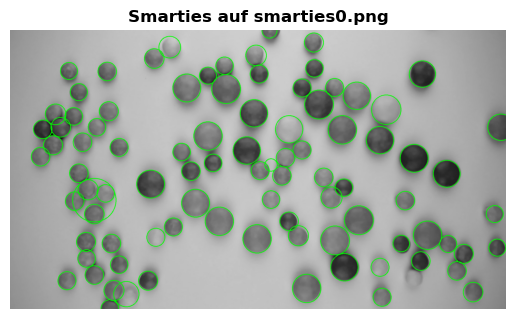

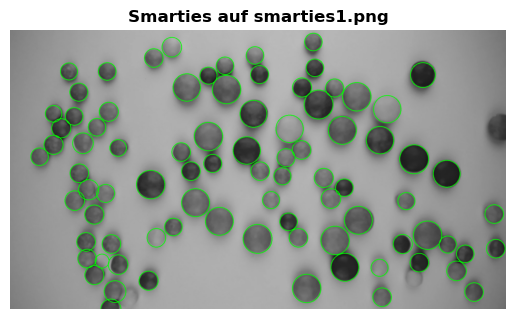

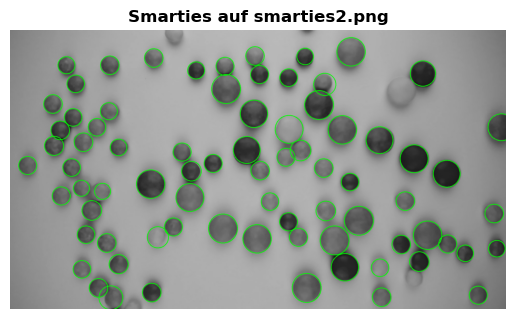

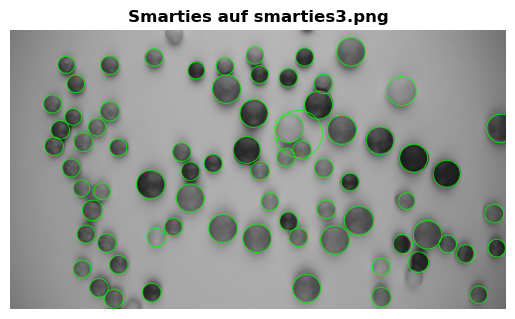

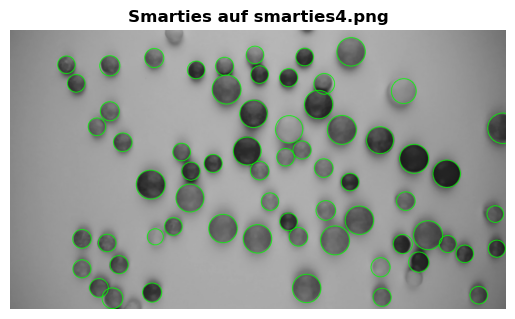

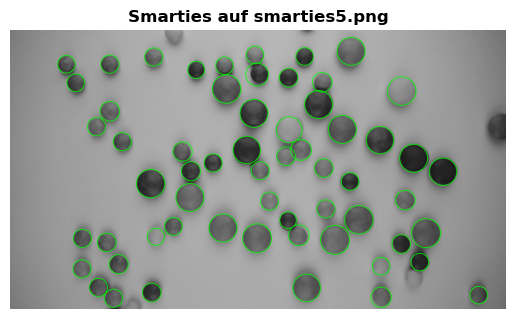

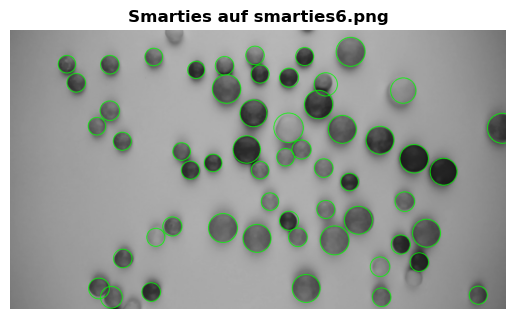

Anzahl Smarties auf Bild 0: 91
Anzahl Smarties auf Bild 1: 85
Anzahl Smarties auf Bild 2: 77
Anzahl Smarties auf Bild 3: 75
Anzahl Smarties auf Bild 4: 65
Anzahl Smarties auf Bild 5: 60
Anzahl Smarties auf Bild 6: 56
Differenz zwischen Bild 0 und Bild 1: -6
Differenz zwischen Bild 1 und Bild 2: -8
Differenz zwischen Bild 2 und Bild 3: -2
Differenz zwischen Bild 3 und Bild 4: -10
Differenz zwischen Bild 4 und Bild 5: -5
Differenz zwischen Bild 5 und Bild 6: -4


In [50]:
def count_smarties(image_path, min_radius=10, max_radius=100):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Wende den Gaußschen Weichzeichner auf das Graustufenbild an
    blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # Finde Kreise im Bild
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=0.5,
        minDist=40,
        param1=45,
        param2=17,
        minRadius=min_radius,
        maxRadius=max_radius
    )

    if circles is not None:
        circles = np.uint16(np.around(circles))

        # Zeichne die erkannten Kreise auf das Bild
        img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        for i in circles[0, :]:
            cv2.circle(img_color, (i[0], i[1]), i[2], (0, 255, 0), 2)

        # Anzeige des Bildes mit erkannten Smarties
        plt.imshow(img_color)
        plt.title(f'Smarties auf {image_path}')
        plt.axis('off')
        plt.show()

        return len(circles[0])
    else:
        print("Keine Smarties gefunden.")
        return 0

# Beispielaufrufe für aufeinanderfolgende Bilder von smarties0 bis smarties7
smarties_counts = []
for i in range(7):
    image_path = f'smarties{i}.png'
    smarties_count = count_smarties(image_path)
    smarties_counts.append(smarties_count)

# Berechne die Differenz zwischen aufeinanderfolgenden Bildern
differences = [smarties_counts[i+1] - smarties_counts[i] for i in range(len(smarties_counts)-1)]

# Zeige die Anzahl der Smarties auf jedem Bild und die Differenzen
for i, count in enumerate(smarties_counts):
    print(f'Anzahl Smarties auf Bild {i}: {count}')

for i, diff in enumerate(differences):
    print(f'Differenz zwischen Bild {i} und Bild {i+1}: {diff}')